# Data Crawling and Graph Creation

In [24]:
################## imports  ####################################
import urllib.request
import pandas as pd
import json
import os
from tqdm.notebook import tqdm
import networkx as nx
import re
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt





In [51]:
baseurl = "https://rickandmorty.fandom.com/api.php?"
action = "action=query"
li = "list=categorymembers"
limit = "cmlimit=500"
title = "cmtitle=Category:Characters"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}&{}&{}".format(baseurl, action, li, title,limit, dataformat, content)
try:
    response = urllib.request.urlopen(query)
except e: #here one specific except
    print(e)
data = response.read()
#text_response = data.decode('utf-8')
#text = BeautifulSoup(text_response, 'html.parser').get_text()
jsontext1 = json.loads(data)

continue_parameter = jsontext1["continue"]["cmcontinue"]

query += "&cmcontinue=" + continue_parameter
try:
    response = urllib.request.urlopen(query)
except e: #here one specific except
    print(e)
data = response.read()
jsontext2 = json.loads(data)

character_pages = []
for char in jsontext1["query"]["categorymembers"]:
    character_pages.append(char['title'])

for char in jsontext2["query"]["categorymembers"]:
    character_pages.append(char["title"])
    

print(len(character_pages))

588


In [52]:
# API fetching
apiUrl = urllib.parse.quote('https://rickandmortyapi.com/api/character/' + str(list(range(1, 550))).replace(' ', ''), safe=':/') 
response = urllib.request.urlopen(apiUrl)
source = response.read()
jsonObj = json.loads(source)
apiNames, c_tuples = [], []
for result in jsonObj:
    apiNames.append(result['name'])
    c_tuple = (result['name'], result['species'], result['status'], result['image'], result['location'])
    c_tuples.append(c_tuple)


In [60]:
characters_parsed = [urllib.parse.quote(x.lower()) for x in character_pages]
validCharacterNames = []
# Keep only characters that exist both in API and on Wiki, to avoid including characters in comic issues
for name in apiNames:
    name_parsed = urllib.parse.quote(name.lower())
    if name_parsed in characters_parsed:
        if name not in validCharacterNames:
            validCharacterNames.append(name)

valid_tuples = []
for c_tuple in c_tuples:
    if c_tuple[0] in validCharacterNames:
        if c_tuple[0] not in [x[0] for x in valid_tuples]:
            valid_tuples.append(c_tuple)

# Creating DataFrame
df = pd.DataFrame(valid_tuples, columns = ['Name','Species','Status', 'ImageUrl', 'LastKnownLocation'])
df.head(10)

df.shape

for name in df["Name"]:
    print(name)


Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Adjudicator Rick
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Beta-Seven
Beth's Mytholog
Big Boobed Waitress
Big Morty
Birdperson
Blim Blam
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Bootleg Portal Chemist Rick
Brad
Brad Anderson
Calypso
Canklanker Thom
Centaur
Chris
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Courier Flap
Cousin Nicky
Crocubot
Cronenberg Rick
Cronenberg Morty
Cult Leader Morty
Cyclops Morty
Cyclops Rick
Cynthia
Dale
Daron Jefferson
David Letterman
Davin
Diablo Verde
Diane Sanchez
Dipper and Mabel Mortys
Doofus Rick
Doom-Nomitron
Dr. Glip-Glop
Dr. Schmidt
Dr. Wong
Dr. Xenon Bloom
Duck With Muscles
Eli
Eli's Girlfriend
Eric Stoltz Mask Morty
Ethan
Evil B

In [61]:
baseurl = "https://rickandmorty.fandom.com/api.php?"
action = "action=query"
revision = "prop=revisions"
content = "rvprop=content"
dataformat = "format=json"
limit = "rvlimit=1"

wikitexts = []
for name in df["Name"]:
    print(name)
    
    # Parsing name for url
    urlName = urllib.parse.quote(name, safe='')
        
    # Building the query
    title = "titles=" + urlName
    query = "%s%s&%s&%s&%s&%s&%s" % (baseurl, action, revision, title, content, dataformat, limit)
    
    # Calling API
    response = urllib.request.urlopen(query)
    source = response.read()

    # Loading Json
    jsonObj = json.loads(source)
    
    # Getting page ID
    pageid = list(jsonObj['query']['pages'].keys())[0]
    
    # Getting content
    if name != 'Agency Director': # TODO: REMOVE THIS CHECK WHEN API IS UPDATED
        fileContent = jsonObj['query']['pages'][pageid]['revisions'][0]['*']
    
    # Converting to a utf-8 string
    utfContent = (str(fileContent).encode("utf-8"))
    
    wikitexts.append(utfContent)

Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Adjudicator Rick
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Beta-Seven
Beth's Mytholog
Big Boobed Waitress
Big Morty
Birdperson
Blim Blam
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Bootleg Portal Chemist Rick
Brad
Brad Anderson
Calypso
Canklanker Thom
Centaur
Chris
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Courier Flap
Cousin Nicky
Crocubot
Cronenberg Rick
Cronenberg Morty
Cult Leader Morty
Cyclops Morty
Cyclops Rick
Cynthia
Dale
Daron Jefferson
David Letterman
Davin
Diablo Verde
Diane Sanchez
Dipper and Mabel Mortys
Doofus Rick
Doom-Nomitron
Dr. Glip-Glop
Dr. Schmidt
Dr. Wong
Dr. Xenon Bloom
Duck With Muscles
Eli
Eli's Girlfriend
Eric Stoltz Mask Morty
Ethan
Evil B

In [62]:
df["Wikitext"] = wikitexts

df.head()

,Name,Species,Status,ImageUrl,LastKnownLocation,Wikitext
0,Rick Sanchez,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Citadel of Ricks', 'url': 'https://r...",b'{{SimilarName|Rick Sanchez (C-137)|[[Rick (d...
1,Morty Smith,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Citadel of Ricks', 'url': 'https://r...",b'{{SimilarName|the main character we follow t...
2,Summer Smith,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...",b'{{for|other versions of Summer Smith|Summer ...
3,Beth Smith,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...",b'{{Character\n|name = Beth Smith\n|image = Be...
4,Adjudicator Rick,Human,Dead,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Citadel of Ricks', 'url': 'https://r...","b""{{Character|image = AdjudicatorRick.PNG|spec..."


In [63]:
df.to_pickle("../Data/characters.pickle")

In [65]:
def flatten_and_remove_empty(l):
    return [item for sublist in l for item in sublist if item != '']
i=0
for ind in df.index:
    print(df["Wikitext"][ind])
    i+=1
    if(i>=5):
        break

b'{{SimilarName|Rick Sanchez (C-137)|[[Rick (disambiguation)|other versions of Rick]]}}\n{{Character\n|image = [[file:Rick Sanchez.png|thumb]]\n|name = Rick Sanchez\n|aka = Rick <br> Grandpa Rick <br> Dad (by Beth) <br> Terror-Rick (by Citadel\'s Militia) <br> Albert Ein-douche (by Jerry) <br> Rick the Alien <br> Tiny Rick (as a teenager) <br> Pickle Rick (as a pickle)<br> The Big R. <br> Smartest Man in the Universe <br> The Man in the White Coat <br> Richard (by his [[Mr. Nimbus|nemesis]]) <br> Rico (by Po\xc3\xb1eta) <br> C-137 (by [[Big Fat Rick]]) <br> The Rickest Rick (by [[Evil Morty]])<br> Tinkerer of Terror (By the Vindicators)<br> Denial Rick (by Jerry)\n|species = Human (Cyborg)\n|origin = Earth ([[Dimension C-137]])\n|age = 70\n|status = Alive\n|job = Scientist<br>Inventor<br>Resistance fighter (formerly)<br>Arms dealer<ref>[[Mortynight Run]]</ref><br>Store owner (briefly)<ref>[[Something Ricked This Way Comes]]</ref><br>Leader of The Council of Ricks (formerly)<br>\n|famil

In [73]:
# Initializing
G = nx.DiGraph()

for ind in df.index:
    name = df['Name'][ind]
    species = df['Species'][ind]
    status = df['Status'][ind]
    lastKnownLocation = df['LastKnownLocation'][ind]
    imgUrl = df['ImageUrl'][ind]
    wikiText = str(df["Wikitext"][ind])
    valid_links = []
    
    # Getting links & infos
    links = re.findall(r'\[\[([\w\-_\#(\)\s]+)\|?([\w\-\s#\(\)]*)\]\]', wikiText)
    links = flatten_and_remove_empty(links)
    
    # Creating Node
    G.add_node(name, Species = species, Status = status, LastKnownLocation = lastKnownLocation)
    
    
    # Sorting links
    # For each link we check if it contains any name in the characters name list
    for link in links:
        if link == 'Rick':
            link = 'Rick Sanchez'
        if link == 'Morty':
            link = 'Morty Smith'
        for l_name in validCharacterNames:
            if (l_name != name) and (l_name in link) and ('Category:' not in link) and ('Image:' not in link) and (l_name not in valid_links):
                valid_links.append(l_name)
                G.add_edge(name, l_name)
print(nx.info(G))

DiGraph with 288 nodes and 780 edges


/tmp/ipykernel_53348/1366110252.py:32: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


288
780
0


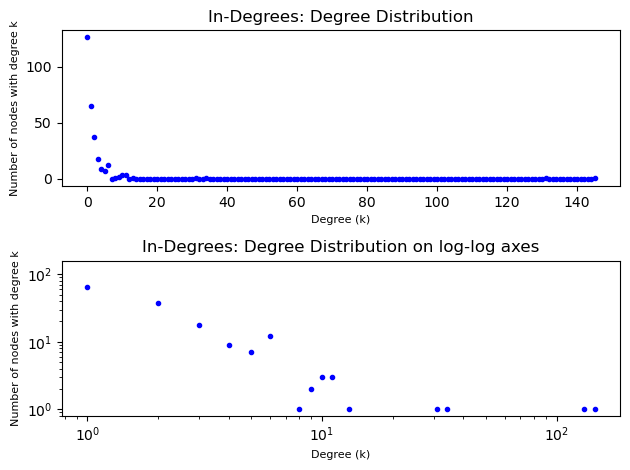

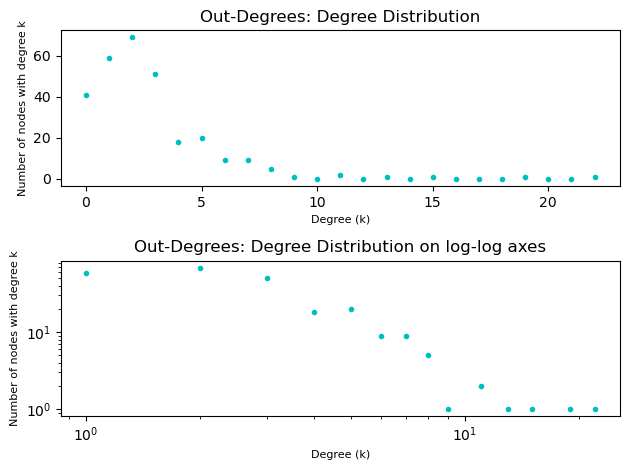

In [75]:
print(G.number_of_nodes())
print(G.number_of_edges())

def plot_degree_distribution(degrees, title, color):
    counts, limits = np.histogram(degrees, degrees[0])

    x = limits[:len(counts)]
    y = counts

    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(x, y, color)
    ax1.set_title(title)
    ax1.set_ylabel('Number of nodes with degree k',fontsize=8)
    ax1.set_xlabel('Degree (k)',fontsize=8)

    ax2 =plt.subplot(2, 1, 2)
    ax2.loglog(x, y, color)
    ax2.set_title(title + ' on log-log axes')
    ax2.set_ylabel('Number of nodes with degree k',fontsize=8)
    ax2.set_xlabel('Degree (k)',fontsize=8 )

    plt.tight_layout()
    plt.show()
        
print(number_of_bidirectional_edges)
    
in_degrees = sorted(list(G.in_degree()),key=lambda d: d[1], reverse=True)
out_degrees = sorted(list(G.out_degree()),key=lambda d: d[1], reverse=True)

in_only_degrees = [val for node,val in in_degrees]
out_only_degrees = [val for node,val in out_degrees]
    

plot_degree_distribution(in_only_degrees, "In-Degrees: Degree Distribution", 'b.')

plot_degree_distribution(out_only_degrees, "Out-Degrees: Degree Distribution", 'c.')

In [76]:
#for the whole network
print("5 most connceted heroes in the whole network based on incoming degree")
print(in_degrees[:5])
print("5 most connceted heroes in the whole network based on outgoing degree")
print(out_degrees[:5])

5 most connceted heroes in the whole network based on incoming degree
[('Rick Sanchez', 146), ('Morty Smith', 131), ('Summer Smith', 34), ('Beth Smith', 31), ('Evil Morty', 13)]
5 most connceted heroes in the whole network based on outgoing degree
[('Morty Smith', 23), ('Rick Sanchez', 19), ('Summer Smith', 15), ('Morty Jr.', 13), ('Beth Smith', 11)]


100%|██████████| 2000/2000 [00:03<00:00, 608.67it/s]


BarnesHut Approximation  took  0.77  seconds
Repulsion forces  took  2.23  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.12  seconds


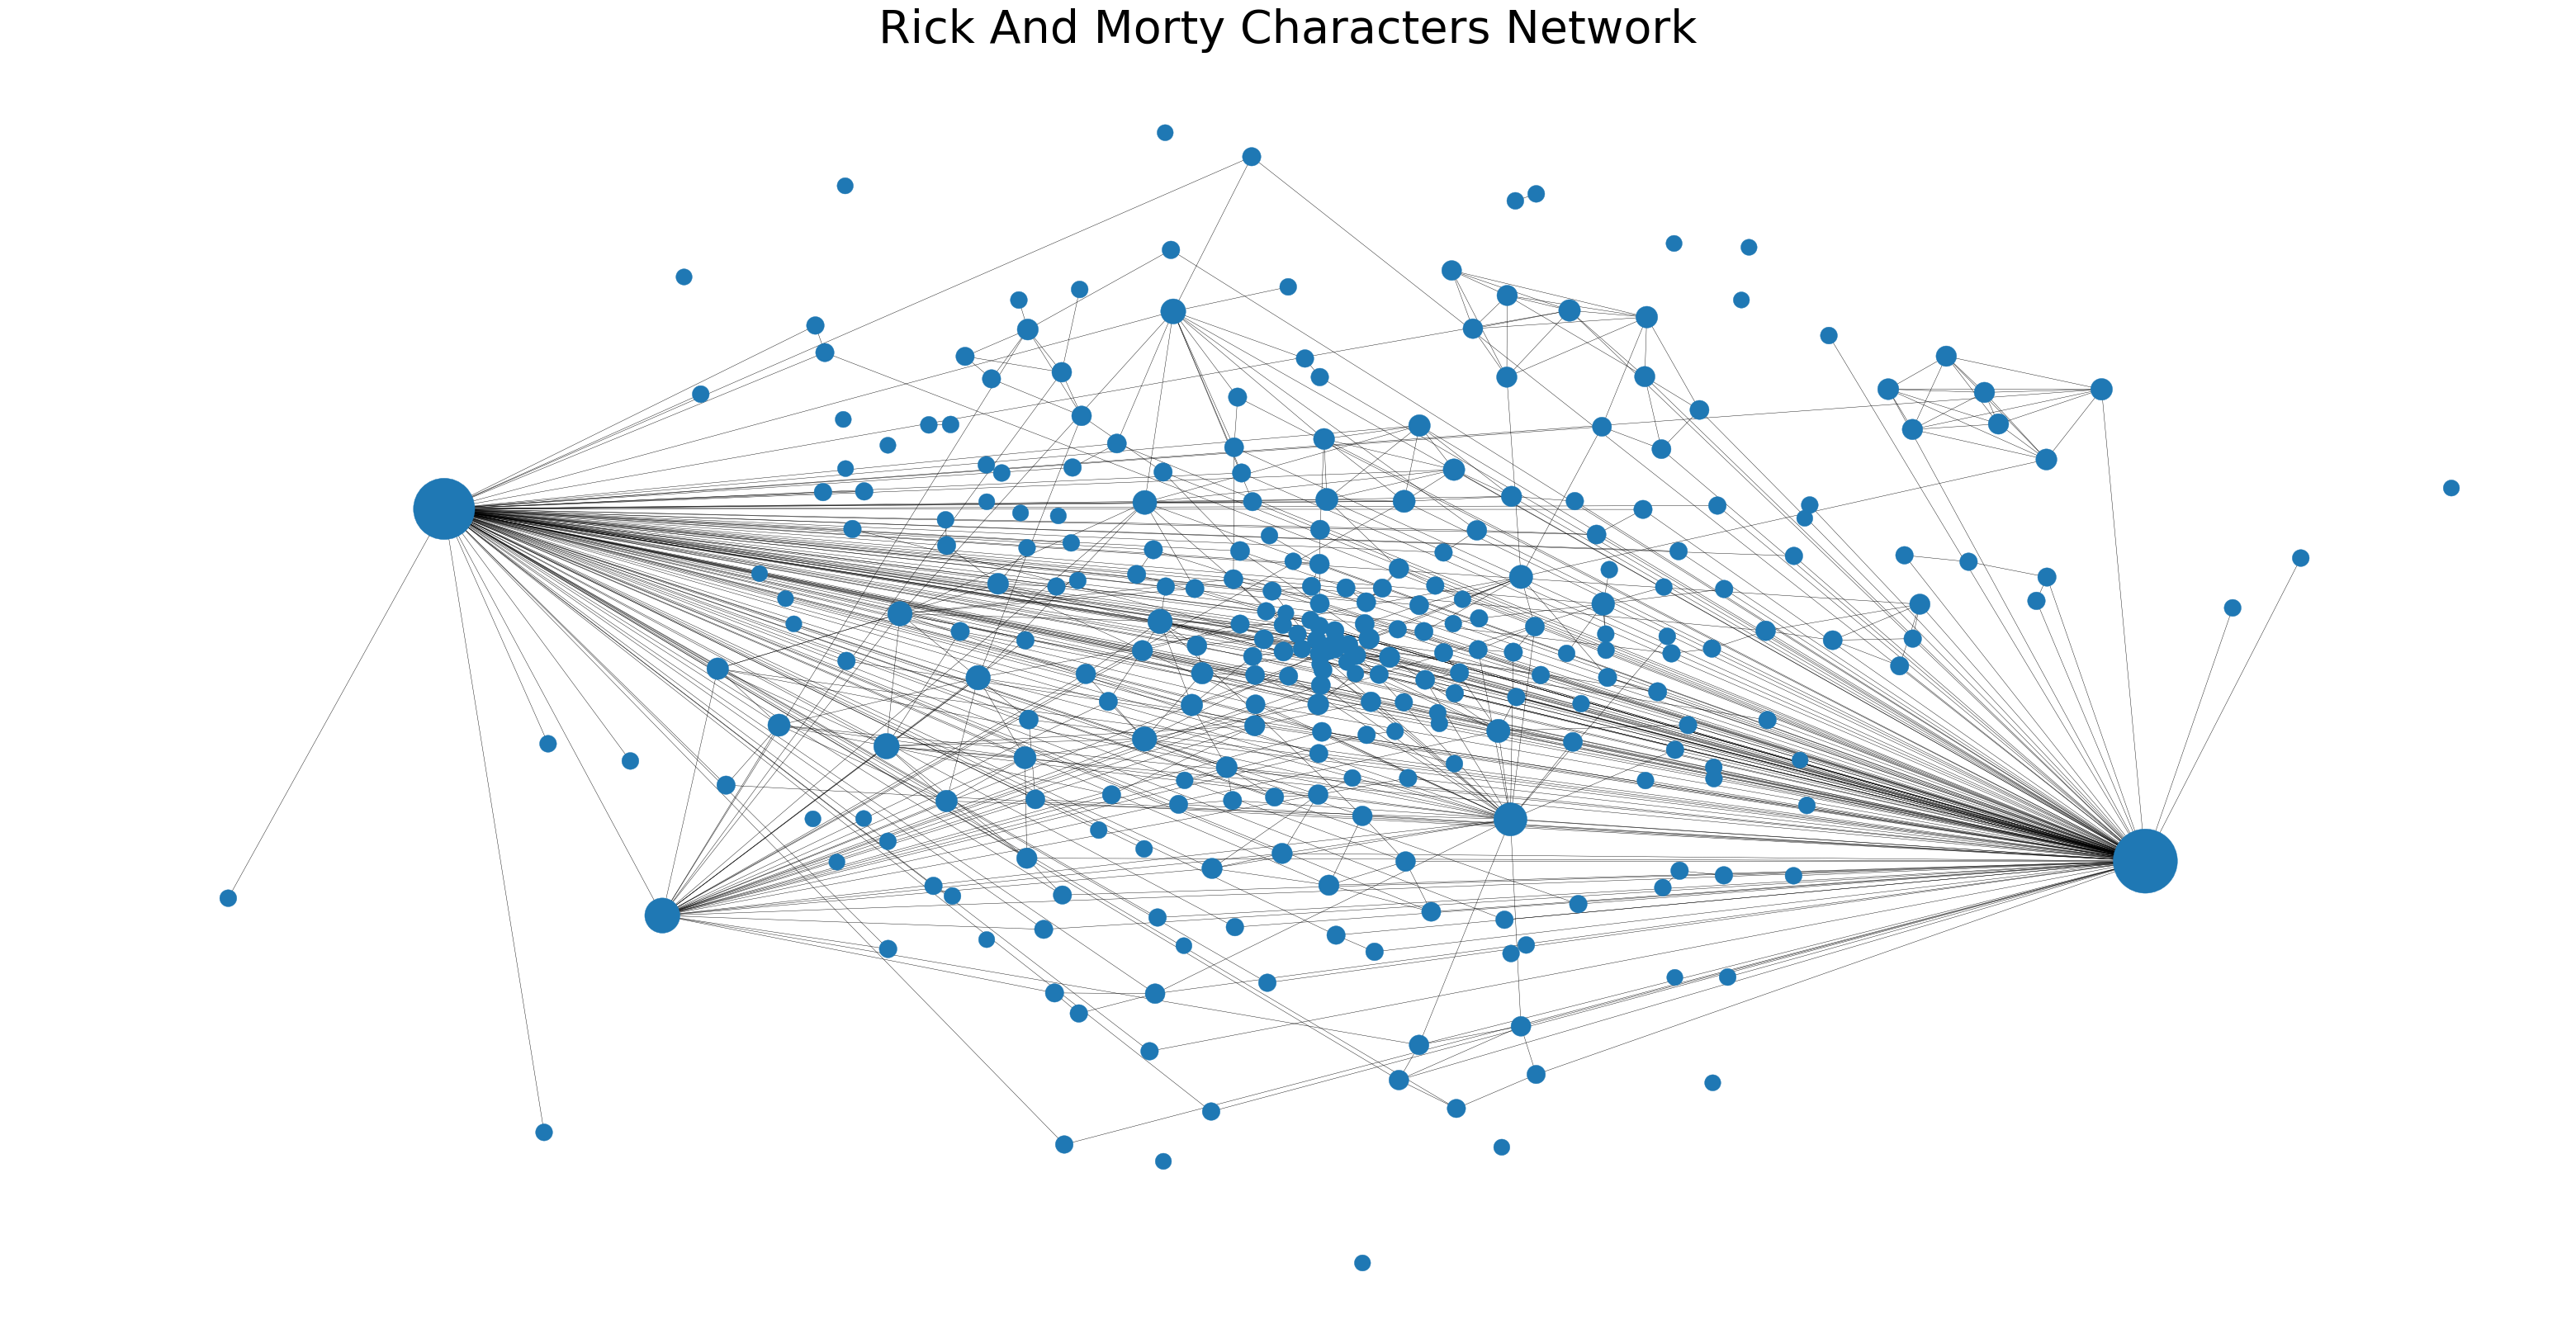

In [86]:
from fa2 import ForceAtlas2
G_un = G.to_undirected()
node_sizes = [val*20+200 for node, val in G_un.degree()]
# node_colors = ['#0000CD' if node[1]['universe'] == "DC" else '#B22222' for node in WCC_undirected.nodes(data=True)]
# edge_colors = ['#000080' if WCC_undirected.nodes[node1]['universe'] == WCC_undirected.nodes[node2]['universe'] == "DC"\
#                else '#8B0000' if WCC_undirected.nodes[node1]['universe'] == WCC_undirected.nodes[node2]['universe'] == "Marvel" \
#                else '#8B008B' for node1,node2 in WCC_undirected.edges]

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.0,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=7,

                        # Log
                        verbose=True)

# plt.figure(figsize=(25,25))
# ax = plt.gca()
# ax.set_title('DC-Marvel Characters Network',fontsize = 40) 
args = {
#'node_color': node_colors,
#'edge_color':edge_colors,
'node_size':node_sizes,
'width':0.3,
'linewidths':0.3,
}

figure = plt.figure(figsize=(40,20))
# plt.savefig(figure, dpi=1200)
ax = plt.gca()
ax.set_title('Rick And Morty Characters Network',fontsize = 40) 

positions = forceatlas2.forceatlas2_networkx_layout(G_un, pos=None, iterations=2000)
nx.draw(G_un,positions, **args, ax=ax)

plt.show()